In [1]:
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv("books.csv")

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [4]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'NonEnglish'],
      dtype='object')

In [5]:
#Q1: How many rows and columns are there in books.csv dataset?
print("{} rows and {} columns are in books".format(books.shape[0],books.shape[1]))

399 rows and 24 columns are in books


In [6]:
#Q2: How many books do not have an original title?
print("The number of books without original title are ",books['original_title'].isnull().sum())

The number of books without original title are  36


In [7]:
#Q3: How many unique books are present in the dataset ?
# Evaluate based on the 'book_id' after removing null values in the original_title column.
books.dropna(subset="original_title",inplace=True)
print("The number of unique books are",books["book_id"].nunique())

The number of unique books are 363


In [8]:
#Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?
print("The average rating of all the books is ",books["average_rating"].mean())

The average rating of all the books is  3.987079889807162


In [9]:
#Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.
print("The number of books published in 2000 is ",books[books["original_publication_year"]==2000].shape[0])


The number of books published in 2000 is  7


In [10]:
#Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.
books[books["work_ratings_count"]==max(books["work_ratings_count"])]["title"]

0    The Diary of a Young Girl
Name: title, dtype: object

<Axes: title={'center': 'Freq of books Vs Avg Rating'}, xlabel='average_rating', ylabel='Freq of books'>

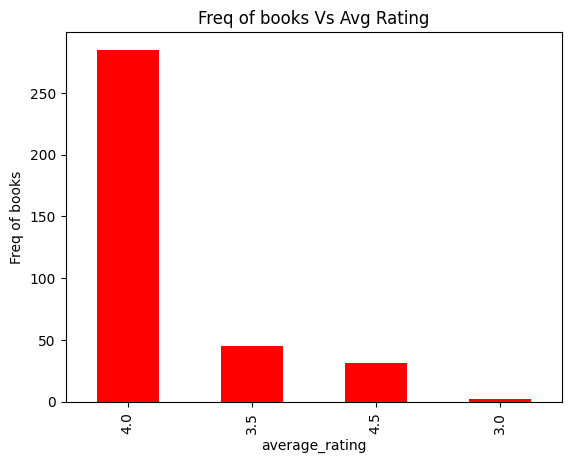

In [11]:
#Q7: Bucket the average_rating of books into 11 buckets 
#[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding 
#Plot bar graph to show total number of books in each rating bucket.
plotvalues = books["average_rating"].apply(lambda x: np.round(x*2)/2).value_counts()
plotvalues.plot(kind = "bar",color = "red",ylabel="Freq of books",title="Freq of books Vs Avg Rating")